In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


rows ,coloumns: (101, 18)
The prediction accuracy is:  80.95238095238095 %


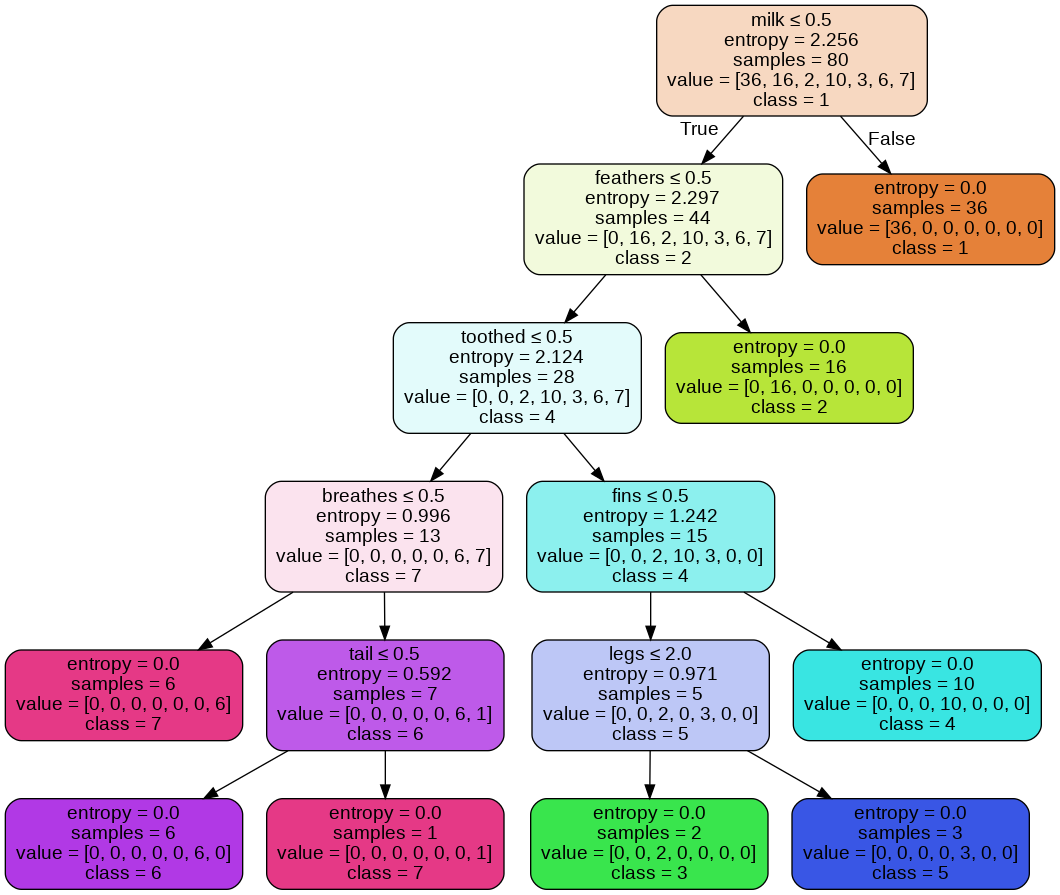

In [22]:

from sklearn.tree import DecisionTreeClassifier

import pandas as pd

#Import the dataset 
dataset = pd.read_csv('/content/drive/My Drive/dbmssss/zoo.csv')
#We drop the animal names since this is not a good feature to split the data on
print("rows ,coloumns:", dataset.shape)
dataset=dataset.drop('animal_name',axis=1)

train_features = dataset.iloc[:80,:-1]
test_features = dataset.iloc[80:,:-1]
#print(train_features)
train_targets = dataset.iloc[:80,-1]
test_targets = dataset.iloc[80:,-1]


tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)

prediction = tree.predict(test_features)

print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")




from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['hair','feathers', 'eggs', 'milk', 'airbone','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['1','2','3','4','5','6','7'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())